### RI TP7

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import Document
import porter
import TextRepresenter
import Parser
import ParserCACM
from index import *
from weighter import *
from modeles import *
from evaluation import *
from QueryParser import *
from RandomModel import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from clustering import *
from sklearn.cluster import KMeans

In [4]:
index = Index("easyCLEF08")

In [3]:
index.indextion(source = 'easyCLEF08/easyCLEF08_text.txt')

In [4]:
index.indextion_inverse(source = "easyCLEF08/easyCLEF08_text.txt")

In [3]:
index

In [50]:
porter = TextRepresenter.PorterStemmer()
query_parser = QueryParser(TextRepresenter.PorterStemmer())
query_parser.initQry('easyCLEF08/easyCLEF08_query.txt')
query_parser.initRel('easyCLEF08/easyCLEF08_gt.txt')
queries = []
for i in range(0,39):
    q =query_parser.nextQuery()
    queries.append(q)

### Comparaison des Méthodes :

In [3]:
weighter = Weighter_01(index)
model = Vectoriel(index, weighter, True)

In [43]:
weighter = Weighter_01(index)
model_vect = Vectoriel(index, weighter, True)
model_l = ModelLangue(index, 0.05)
model_o = ModelBM25(index)
models = [model_vect, model_l, model_o]

In [52]:
pn20 = []
crn20 = []
for i in models:
    
    Eval = Pn(i, queries, 20)
    pn20.append(Eval.Evaluation_queries())
    Eval2 = CRn(i, queries, 20)
    crn20.append(Eval2.Evaluation_queries())
    

['23297', '23959', '38169', '37169', '32866', '37371', '37201', '37353', '37391', '13713', '21420', '37392', '10171', '37202', '37208', '23241', '37387', '13036', '4898', '4945']
['3407', '3414', '38216', '38217', '38218', '38219', '38221', '38222', '35780', '35884', '35885', '4815', '4759', '21221', '4723', '14520', '15973', '30334', '38898', '39169']
['38271', '23052', '3090', '3166', '26625', '15405', '19114', '13183', '30869', '30866', '30827', '30828', '3573', '30817', '30822', '30830', '30865', '16638', '30831', '30825']
['37567', '37603', '37761', '37786', '37789', '37790', '37765', '38160', '37788', '37735', '37627', '37568', '37569', '37601', '37667', '37668', '37677', '37678', '37595', '37602']
['21324', '3147', '21256', '9595', '4089', '21212', '21222', '37244', '11629', '27619', '13594', '37896', '37897', '37895', '7043', '13546', '4946', '4082', '21221', '27679']


In [53]:
print(pn20, crn20)

[0.5700000000000001] [0.5334782608695653]


In [38]:
result = pd.DataFrame([pn20,crn20], index = ["P@20", "CR@20"], columns = ['Vectoriel', 'ModelLangue', 'BM25'])
result

,Vectoriel,ModelLangue,BM25
P@20,0.333333,0.200000,0.4
CR@20,0.208333,0.083333,0.3


In [56]:
result = pd.DataFrame([pn20,crn20], index = ["P@10", "CR@10"], columns = ['Vectoriel', 'ModelLangue', 'BM25'])
result

,Vectoriel,ModelLangue,BM25
P@10,0.215385,0.223077,0.674359
CR@10,0.173756,0.158160,0.444638


# choix de l'algorithme clustering:

## Model BM25 avec Clustering:

## Birch:

In [4]:
model = ModelLangue(index, 0.05)

In [9]:
clustering = Birch( branching_factor=50, n_clusters=50, threshold=0.5, compute_labels=True)
modelClus = ClusteringModel(index, model, clustering)


In [44]:
type(docs[0])

str

In [6]:
Evalpn = Pn(modelClus, queries, 20)

In [46]:
Evalpn.Evaluation_queries()

0.5012820512820512

In [10]:
EvalCRn = CRn(modelClus, queries, 20)

In [11]:
EvalCRn.Evaluation_queries()

/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.v

/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.v

0.26002077632512416

#### 10

In [58]:
Evalpn = Pn(modelClus, queries, 10)
Evalpn.Evaluation_queries()

0.5076923076923077

In [59]:
EvalCRn = CRn(modelClus, queries, 10)
EvalCRn.Evaluation_queries()

0.4082757419713941

## Kmeans 

#### RANG:

In [51]:
res = []
perres = []
model = ModelBM25(index)
#1, 3, 5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 80, 100
for i in [1, 3, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90]:
    print(i)
    kmeans = KMeans(n_clusters= i, random_state=0, max_iter = 10000)
    modelClus = ClusteringModel(index, model, kmeans)
    EvalCRn = CRn(modelClus, queries, 20)
    res.append(EvalCRn.Evaluation_queries())
    
    EvalPn = Pn(modelClus, queries, 20)
    perres.append(EvalPn.Evaluation_queries())
    


1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster #################

taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ###################

taille cluster ######################## 15
taille cluster ######################## 15
taille cluster ######################## 15
20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille c

taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille clus

taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille c

taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille clus

taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille clus

/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille clus

/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (87) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 87


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (88) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 88
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (84) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 84


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (83) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 83
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 80
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (87) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 87


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (88) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 88
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (84) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 84


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (83) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 83
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 80
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


In [62]:
print(res, perres)

[0.574311236267758, 0.5469645089210307, 0.5402514554688468, 0.5156880559054472, 0.5492507894681807, 0.5410397573441053, 0.5837272228576577, 0.5797648004169744, 0.6192795127577736, 0.6230720165502774, 0.6111013784926829, 0.6346879770792815, 0.6233269146312624, 0.6421007334050812, 0.6330958494001973, 0.6345486236790584, 0.6060833691268475] [0.6576923076923078, 0.4935897435897435, 0.45128205128205123, 0.3923076923076923, 0.41410256410256413, 0.34871794871794876, 0.391025641025641, 0.4307692307692309, 0.458974358974359, 0.4897435897435898, 0.4935897435897436, 0.5089743589743589, 0.5256410256410257, 0.5461538461538461, 0.5641025641025641, 0.6115384615384617, 0.6346153846153846]


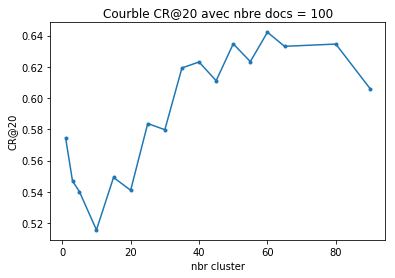

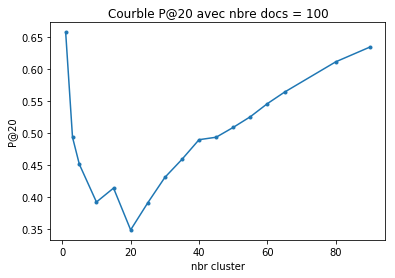

In [60]:
plt.plot([1,3, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90], res, marker = '.')
plt.title("Courble CR@20 avec nbre docs = 100", )
plt.xlabel("nbr cluster")
plt.ylabel("CR@20")
plt.show()

plt.plot([1, 3, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90], perres, marker = '.')
plt.title("Courble P@20 avec nbre docs = 100")
plt.xlabel("nbr cluster")
plt.ylabel("P@20")
plt.show()


In [71]:
rn = []
pn = []
model = ModelBM25(index)
#1, 3, 5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 80, 100
for i in [100, 200, 400, 600,800,1000,1500,2000 ]:
    print(i)
    kmeans = KMeans(n_clusters= 60, random_state=0, max_iter = 10000)
    modelClus = ClusteringModel(index, model, kmeans, nbrDocs = i)
    EvalCRn = CRn(modelClus, queries, 20)
    rn.append(EvalCRn.Evaluation_queries())
    
    EvalPn = Pn(modelClus, queries, 20)
    pn.append(EvalPn.Evaluation_queries())
    

100
200
400
600
800
1000
1500


KeyboardInterrupt: 

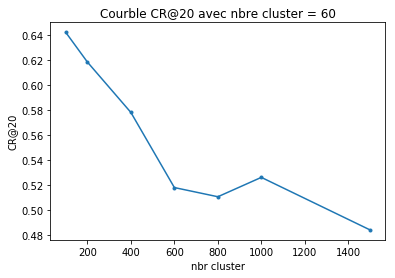

ValueError: x and y must have same first dimension, but have shapes (7,) and (6,)

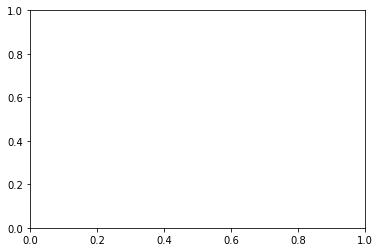

In [73]:
plt.plot([100, 200, 400, 600,800,1000,1500], rn, marker = '.')
plt.title("Courble CR@20 avec nbre cluster = 60", )
plt.xlabel("nbr cluster")
plt.ylabel("CR@20")
plt.show()

plt.plot([100, 200, 400, 600,800,1000,1500], pn, marker = '.')
plt.title("Courble P@20 avec nbre cluster = 60")
plt.xlabel("nbr cluster")
plt.ylabel("P@20")
plt.show()